<a href="https://colab.research.google.com/github/Rana-Shukor/vector1/blob/main/Copy_of_Welcome_to_Your_PyTorch_Learning_Journey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Your PyTorch Learning Journey

## Overview

This notebook is designed to introduce you to the fundamentals of PyTorch, a powerful and flexible deep learning framework. By working through this notebook, you'll gain hands-on experience in building and training neural networks, a core skill in machine learning and artificial intelligence.

## What You'll Learn

- **PyTorch Basics:** You'll start by exploring the basic building blocks of PyTorch, including tensors, autograd, and neural network modules.
- **Building a Simple Neural Network:** You'll implement a simple feedforward neural network from scratch using PyTorch and learn how to train it on synthetic data.
- **Training Loops and Optimization:** You'll understand how to implement the training loop, calculate loss, and update the model's parameters using gradient descent.

## Example and Guide

As you progress through this notebook, you'll find examples and explanations that will help you understand each concept. Code snippets are provided to demonstrate how to use PyTorch for various tasks. Follow along with the code, and feel free to modify it to see how different changes affect the outcome.

## The Assignment

After you've familiarized yourself with the basics, you'll be given an assignment to apply what you've learned to a real-world dataset: the MNIST dataset. This assignment will challenge you to build, train, and evaluate a neural network that can classify handwritten digits.

The assignment is designed to consolidate your learning and give you practical experience with a common deep learning task. If you're up for an additional challenge, you can also explore more advanced architectures as a bonus.


---

Let's get started!


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


# Define the Neural Network Model

Here, we define a simple neural network class `SimpleNet` using PyTorch's `nn.Module`. This network consists of four linear layers with ReLU activations applied after each layer, except the final output layer.


In [ ]:
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, hidden_size1, hidden_size2):
        super(SimpleNet, self).__init__()
        self.layer1 = nn.Linear(1, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, hidden_size2)
        self.layer4 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# Example of usage:
# model = SimpleNet(hidden_size1=10, hidden_size2=5)
# input = torch.randn(1, 1)  # Example input tensor
# output = model(input)
# print(output)


# Create a Model Wrapper Class

The `ModelWrapper` class is used to encapsulate the model, loss function, and optimizer. This allows for easier management of the forward and backward passes during training.


In [1]:
class ModelWrapper:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inputs):
        return self.model(inputs)

    def backward(self, loss):
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


# Generate Synthetic Data

In this section, we define a function to generate synthetic data. The data has a linear relationship with added noise, and the target variable `y` is cubed to introduce non-linearity.


In [ ]:
def generate_data(num_samples):
    x = torch.randn(num_samples, 1)
    y = 0.5 * x + 0.1 * torch.randn(num_samples, 1)  # Create correlation
    y = y**3  # Raise y to cubic power
    return x, y


# Initialize the Model, Loss Function, and Optimizer

Here, we initialize the `SimpleNet` model with specified hidden layer sizes. We also define the Mean Squared Error (MSE) loss function and the Adam optimizer with a learning rate of 0.01.


In [ ]:
hidden_size1 = 32
hidden_size2 = 32

model = SimpleNet(hidden_size1, hidden_size2)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

wrapper = ModelWrapper(model, loss_fn, optimizer)


# Train the Model

This cell contains the training loop, where the model is trained for a specified number of epochs. During each epoch, the forward and backward passes are performed, and the loss is printed every two epochs.


In [ ]:
num_epochs = 10
num_samples = 100
x, y = generate_data(num_samples)

for epoch in range(num_epochs):
    # Explicit forward pass
    outputs = wrapper.forward(x)
    loss = loss_fn(outputs, y)

    # Explicit backward pass
    wrapper.backward(loss)

    if (epoch + 1) % 2 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [2/10], Loss: 0.0250
Epoch [4/10], Loss: 0.0224
Epoch [6/10], Loss: 0.0205
Epoch [8/10], Loss: 0.0202
Epoch [10/10], Loss: 0.0199


# Plot the Results with Seaborn

In this optional cell, we use Seaborn to visualize the original data and the model's predictions after training. Seaborn provides a more visually appealing style to the plots.


In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Assume model, x, and y are already defined and x is your input tensor

# Set model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Create a scatter plot of the original data
sns.scatterplot(x=x.numpy().flatten(), y=y.numpy().flatten(), color='red', label='Original data')

# Create a line plot of the model's predictions
sns.lineplot(x=x.numpy().flatten(), y=predicted.flatten(), color='blue', label='Fitted line')

# Add title and labels
plt.title('Model Predictions vs. Original Data')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')

NameError: name 'model' is not defined

# Your Next Task: Train a Neural Network on the MNIST Dataset

Now that you've explored the basics of PyTorch and built a simple model, it's time to apply your knowledge to a more practical example. A common and classic task in deep learning is to train a model on the MNIST dataset, which contains handwritten digits.

## Steps to Follow:

1. **Download and Prepare the MNIST Dataset:**
   - Use PyTorch's `torchvision` library to download and preprocess the MNIST dataset.

2. **Define a Neural Network:**
   - Create a simple neural network that is suitable for classifying the 28x28 pixel images of handwritten digits.

3. **Train the Model:**
   - Implement the training loop, train the model on the MNIST dataset, and monitor the training loss.
   - Use the trained model to make predictions on the test dataset.

4. **Evaluate and Visualize Results:**
   - Evaluate the model's performance on the test dataset and visualize some of the predictions.

## Helpful Tips:

- **Start Simple:** Focus on building a basic neural network architecture, such as a few fully connected layers.
- **Experiment:** Try different optimizers, learning rates, and network architectures to see how they affect performance.
- **Visualize:** Use `seaborn` or `matplotlib` to visualize the loss over time and the model's predictions.

## Bonus (Optional):

If you're feeling adventurous, you can try implementing a Convolutional Neural Network (CNN) for this task as an additional challenge. CNNs are particularly well-suited for image data and may improve your model's performance.

## Need Help?

If you need help getting started, feel free to ask questions, and I'll guide you through the process!


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52173048.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1851265.30it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13730888.23it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2439560.61it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 0.3174275370108198
Epoch 2, Loss: 0.11408259926923811
Epoch 3, Loss: 0.07768425989949675
Epoch 4, Loss: 0.05824597531766779
Epoch 5, Loss: 0.04504476029881096
Epoch 6, Loss: 0.03493890396035366
Epoch 7, Loss: 0.02829883431179026
Epoch 8, Loss: 0.02158000177506711
Epoch 9, Loss: 0.01638097787347398
Epoch 10, Loss: 0.01280639520058518
Finished Training
Accuracy of the network on the 10000 test images: 97.74%


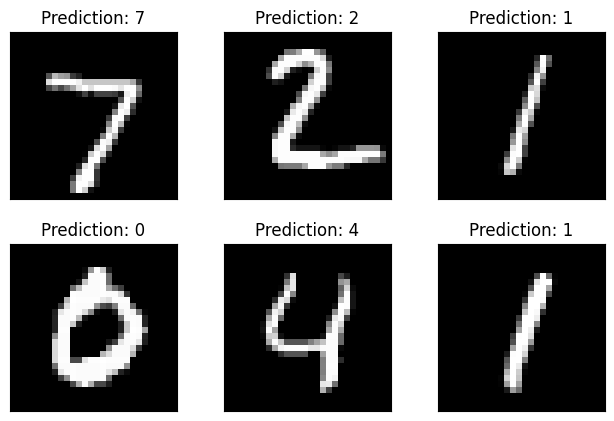

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Download and Prepare the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Step 2: Define a Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)       # Second fully connected layer
        self.fc3 = nn.Linear(64, 10)        # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Train the Model
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

print('Finished Training')

# Step 4: Evaluate and Visualize Results
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

# Visualize some predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Prediction: {output.data.max(1, keepdim=True)[1][i].item()}")
    plt.xticks([])
    plt.yticks([])
plt.show()
